# Prince Sharma : M.sc Data science ( University of Glasgow)
## StatsBomb Task
## prince.martinian@gmail.com

### Data Preprocessing

In [503]:
pip install statsbomb


Note: you may need to restart the kernel to use updated packages.


In [504]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [505]:
import pandas as pd
import statsbomb as sb

In [506]:
import glob
import json
path = r'D:\open-data-master\data\lineups' # use your path
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    df = pd.read_json(filename)
    li.append(df)
df_lineup=pd.concat(li)    

In [507]:
df_lineup.describe()

,team_id
count,1778.000000
mean,530.590551
std,372.771158
min,1.000000
25%,217.000000
50%,222.000000
75%,965.000000
max,1475.000000


In [508]:
df_lineup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778 entries, 0 to 1
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team_id    1778 non-null   int64 
 1   team_name  1778 non-null   object
 2   lineup     1778 non-null   object
dtypes: int64(1), object(2)
memory usage: 55.6+ KB


In [509]:
comps = sb.Competitions().get_dataframe()

In [510]:
comps

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-07-29T05:00,2020-07-29T05:00
1,16,1,Europe,Champions League,male,2017/2018,2020-07-29T05:00,2020-07-29T05:00
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [511]:
comps.describe()



,competition_id,season_id
count,38.000000,38.000000
mean,18.236842,27.368421
std,13.439422,19.517727
min,2.000000,1.000000
25%,11.000000,21.000000
50%,16.000000,25.500000
75%,16.000000,39.000000
max,72.000000,90.000000


In [512]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   competition_id      38 non-null     int64 
 1   season_id           38 non-null     int64 
 2   country_name        38 non-null     object
 3   competition_name    38 non-null     object
 4   competition_gender  38 non-null     object
 5   season_name         38 non-null     object
 6   match_updated       38 non-null     object
 7   match_available     37 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.5+ KB


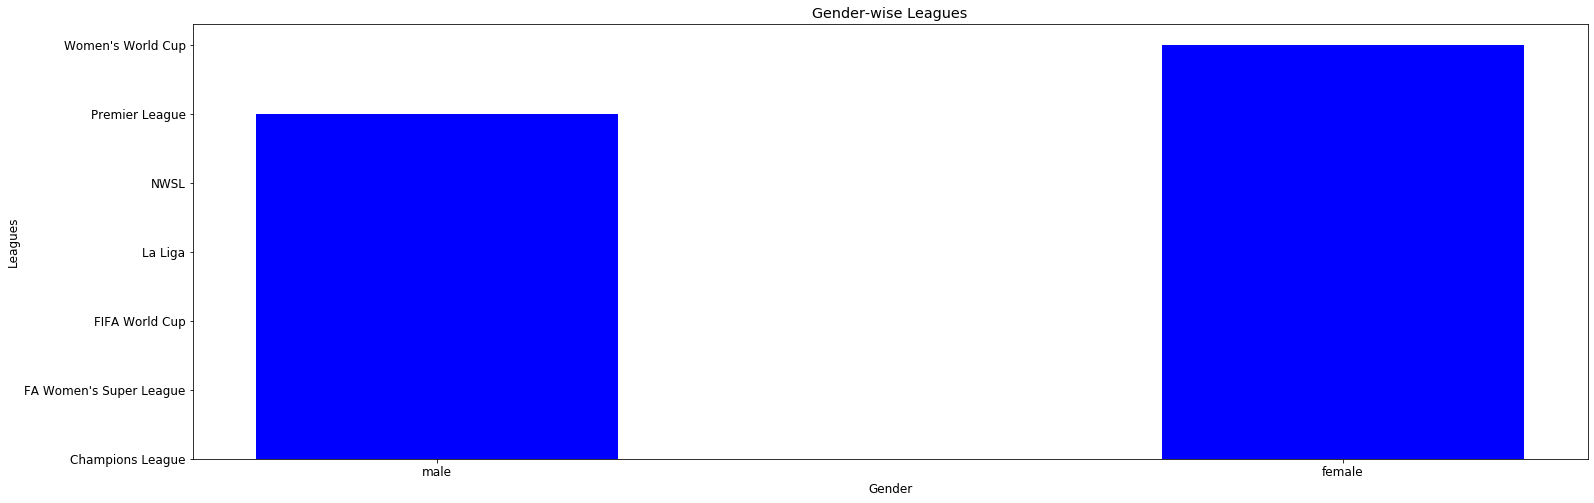

In [608]:
import numpy as np 
import matplotlib.pyplot as plt     
fig = plt.figure(figsize = (25, 8)) 
x=comps.competition_gender
y=comps.competition_name
# creating the bar plot 
plt.bar(x, y, color ='blue',  
        width = 0.4)  
plt.xlabel("Gender") 
plt.ylabel("Leagues") 
plt.title("Gender-wise Leagues") 
plt.show()

### Selection of  La Liga ( Competition_id =11)  for this season and last two seasons

In [513]:
competition_id = 11
season_id = 4 # Season 2018/2019
old_laliga= sb.Matches(event_id=competition_id, season_id=season_id).get_dataframe()


In [514]:
old_laliga

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee
0,16157,2019-02-02,18:30:00.000,11,4,217,207,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 221, 'name': 'Alberto Undiano', 'countr..."
1,16136,2019-01-20,20:45:00.000,11,4,217,205,3,1,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",20,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun..."
2,16215,2019-03-17,20:45:00.000,11,4,218,217,1,4,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",28,"{'id': 1, 'name': 'Regular Season'}","{'id': 352, 'name': 'Estadio Benito Villamarín...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun..."
3,16248,2019-04-06,20:45:00.000,11,4,217,212,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
4,16056,2018-11-11,16:15:00.000,11,4,217,218,3,4,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",12,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 180, 'name': 'Antonio Mateu', 'country'..."
5,16289,2019-04-27,20:45:00.000,11,4,217,221,1,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",35,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun..."
6,16079,2018-12-02,18:30:00.000,11,4,217,222,2,0,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",14,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 224, 'name': 'José Munuera', 'country':..."
7,16149,2019-01-27,16:15:00.000,11,4,211,217,0,2,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",21,"{'id': 1, 'name': 'Regular Season'}","{'id': 343, 'name': 'Estadi Municipal de Monti...","{'id': 219, 'name': 'Pablo González', 'country..."
8,16275,2019-04-23,21:30:00.000,11,4,206,217,0,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",34,"{'id': 1, 'name': 'Regular Season'}",NaN,NaN
9,15973,2018-09-02,18:30:00.000,11,4,217,902,8,2,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",3,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 209, 'name': 'Mario Melero', 'country':..."


In [515]:
old_laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           34 non-null     int64 
 1   match_date         34 non-null     object
 2   kick_off           34 non-null     object
 3   competition        34 non-null     object
 4   season             34 non-null     object
 5   home_team          34 non-null     object
 6   away_team          34 non-null     object
 7   home_score         34 non-null     int64 
 8   away_score         34 non-null     int64 
 9   match_status       34 non-null     object
 10  last_updated       34 non-null     object
 11  metadata           34 non-null     object
 12  match_week         34 non-null     int64 
 13  competition_stage  34 non-null     object
 14  stadium            33 non-null     object
 15  referee            33 non-null     object
dtypes: int64(4), object(12)
memory usage: 4.4+ KB


In [516]:
old_laliga.describe()

,match_id,home_score,away_score,match_week
count,34.000000,34.000000,34.000000,34.000000
mean,16130.058824,1.794118,1.529412,19.176471
std,109.310495,1.591253,1.461326,10.975097
min,15946.000000,0.000000,0.000000,1.000000
25%,16035.750000,1.000000,0.000000,9.750000
50%,16133.500000,2.000000,1.000000,19.500000
75%,16212.500000,2.000000,2.000000,27.750000
max,16317.000000,8.000000,5.000000,38.000000


In [517]:
season_id1 = 1 # Season 2017/2018
old_laliga1= sb.Matches(event_id=competition_id, season_id=season_id1).get_dataframe()

In [518]:
old_laliga1

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee
0,9592,2017-09-09,20:45:00.000,11,1,217,214,5,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",3,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
1,9870,2018-04-07,20:45:00.000,11,1,217,205,3,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun..."
2,9783,2018-02-04,16:15:00.000,11,1,214,217,1,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 351, 'name': 'RCDE Stadium', 'country':...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
3,9609,2017-09-19,22:00:00.000,11,1,217,322,6,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",5,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 208, 'name': 'Alejandro Hernández', 'co..."
4,9700,2017-12-02,13:00:00.000,11,1,217,209,2,2,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",14,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 209, 'name': 'Mario Melero', 'country':..."
5,9860,2018-03-31,20:45:00.000,11,1,213,217,2,2,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",30,"{'id': 1, 'name': 'Regular Season'}","{'id': 349, 'name': 'Estadio Ramón Sánchez Piz...","{'id': 211, 'name': 'José González', 'country'..."
6,9695,2017-11-26,20:45:00.000,11,1,207,217,1,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",13,"{'id': 1, 'name': 'Regular Season'}","{'id': 344, 'name': 'Estadio de Mestalla', 'co...","{'id': 218, 'name': 'Ignacio Iglesias', 'count..."
7,9794,2018-02-11,16:15:00.000,11,1,217,216,0,0,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",23,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 222, 'name': 'David Fernández', 'countr..."
8,9717,2017-12-10,20:45:00.000,11,1,222,217,0,2,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",15,"{'id': 1, 'name': 'Regular Season'}","{'id': 361, 'name': 'Estadio de la Cerámica', ...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun..."
9,9620,2017-09-23,20:45:00.000,11,1,211,217,0,3,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",6,"{'id': 1, 'name': 'Regular Season'}","{'id': 343, 'name': 'Estadi Municipal de Monti...","{'id': 220, 'name': 'José Sánchez', 'country':..."


In [519]:
old_laliga1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           36 non-null     int64 
 1   match_date         36 non-null     object
 2   kick_off           36 non-null     object
 3   competition        36 non-null     object
 4   season             36 non-null     object
 5   home_team          36 non-null     object
 6   away_team          36 non-null     object
 7   home_score         36 non-null     int64 
 8   away_score         36 non-null     int64 
 9   match_status       36 non-null     object
 10  last_updated       36 non-null     object
 11  metadata           36 non-null     object
 12  match_week         36 non-null     int64 
 13  competition_stage  36 non-null     object
 14  stadium            36 non-null     object
 15  referee            36 non-null     object
dtypes: int64(4), object(12)
memory usage: 4.6+ KB


In [520]:
old_laliga1.describe()

,match_id,home_score,away_score,match_week
count,36.000000,36.000000,36.000000,36.000000
mean,9751.361111,1.833333,1.416667,18.777778
std,110.578777,1.681836,1.295597,10.918166
min,9575.000000,0.000000,0.000000,1.000000
25%,9658.250000,0.750000,0.000000,9.750000
50%,9748.000000,2.000000,1.000000,18.500000
75%,9841.500000,2.000000,2.000000,27.500000
max,9948.000000,6.000000,5.000000,38.000000


In [521]:
season_id2 = 42 # Season 2019/2020
laliga = sb.Matches(event_id=competition_id, season_id=42).get_dataframe()

In [522]:
laliga

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee
0,303421,2020-07-19,17:00:00.000,11,42,206,217,0,5,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 348, 'name': 'Estadio de Mendizorroza',...","{'id': 207, 'name': 'Juan Martínez', 'country'..."
1,303493,2020-06-23,22:00:00.000,11,42,217,215,1,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
2,303516,2020-06-27,17:00:00.000,11,42,209,217,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",32,"{'id': 1, 'name': 'Regular Season'}","{'id': 653, 'name': 'Abanca-Balaídos', 'countr...","{'id': 451, 'name': 'Guillermo Cuadra', 'count..."
3,303680,2020-07-11,19:30:00.000,11,42,901,217,0,1,available,2020-07-29T22:07:46.233001,"{'data_version': '1.1.0', 'shot_fidelity_versi...",36,"{'id': 1, 'name': 'Regular Season'}","{'id': 622, 'name': 'Estadio Municipal José Zo...","{'id': 180, 'name': 'Antonio Mateu', 'country'..."
4,303532,2020-06-16,22:00:00.000,11,42,217,205,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",29,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 207, 'name': 'Juan Martínez', 'country'..."
5,303400,2020-01-25,16:00:00.000,11,42,207,217,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",21,"{'id': 1, 'name': 'Regular Season'}","{'id': 344, 'name': 'Estadio de Mestalla', 'co...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
6,303634,2020-07-16,21:00:00.000,11,42,217,422,1,2,available,2020-08-28T07:09:37.955531,"{'data_version': '1.1.0', 'shot_fidelity_versi...",37,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 220, 'name': 'José Sánchez', 'country':..."
7,303479,2020-03-07,18:30:00.000,11,42,217,210,1,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",27,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 207, 'name': 'Juan Martínez', 'country'..."
8,303615,2020-07-08,22:00:00.000,11,42,217,214,1,0,available,2020-08-11T18:14:00.795163,"{'data_version': '1.1.0', 'shot_fidelity_versi...",35,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 224, 'name': 'José Munuera', 'country':..."
9,303696,2020-06-30,22:00:00.000,11,42,217,212,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",33,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 208, 'name': 'Alejandro Hernández', 'co..."


In [523]:
laliga.describe()

,match_id,home_score,away_score,match_week
count,33.000000,33.000000,33.000000,33.000000
mean,303574.818182,1.848485,1.272727,21.939394
std,107.241974,1.523179,1.352607,9.772216
min,303377.000000,0.000000,0.000000,5.000000
25%,303487.000000,1.000000,0.000000,14.000000
50%,303596.000000,2.000000,1.000000,22.000000
75%,303674.000000,2.000000,2.000000,30.000000
max,303731.000000,5.000000,5.000000,38.000000


In [524]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           33 non-null     int64 
 1   match_date         33 non-null     object
 2   kick_off           33 non-null     object
 3   competition        33 non-null     object
 4   season             33 non-null     object
 5   home_team          33 non-null     object
 6   away_team          33 non-null     object
 7   home_score         33 non-null     int64 
 8   away_score         33 non-null     int64 
 9   match_status       33 non-null     object
 10  last_updated       33 non-null     object
 11  metadata           33 non-null     object
 12  match_week         33 non-null     int64 
 13  competition_stage  33 non-null     object
 14  stadium            33 non-null     object
 15  referee            33 non-null     object
dtypes: int64(4), object(12)
memory usage: 4.2+ KB


### Mapping to get Home and Away Team Names using team_id :

In [525]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
old_laliga['Home_Team'] = old_laliga.home_team.map(mapping)

In [526]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
old_laliga['Away_Team'] = old_laliga.away_team.map(mapping)

In [527]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
old_laliga1['Home_Team'] = old_laliga1.home_team.map(mapping)

In [528]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
old_laliga1['Away_Team'] = old_laliga1.away_team.map(mapping)

In [529]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
laliga['Home_Team'] = laliga.home_team.map(mapping)

In [530]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
laliga['Away_Team'] = laliga.away_team.map(mapping)

In [531]:
old_laliga.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,16157,2019-02-02,18:30:00.000,11,4,217,207,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 221, 'name': 'Alberto Undiano', 'countr...",Barcelona,Valencia
1,16136,2019-01-20,20:45:00.000,11,4,217,205,3,1,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",20,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Barcelona,Leganés
2,16215,2019-03-17,20:45:00.000,11,4,218,217,1,4,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",28,"{'id': 1, 'name': 'Regular Season'}","{'id': 352, 'name': 'Estadio Benito Villamarín...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Real Betis,Barcelona
3,16248,2019-04-06,20:45:00.000,11,4,217,212,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Atlético Madrid
4,16056,2018-11-11,16:15:00.000,11,4,217,218,3,4,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",12,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 180, 'name': 'Antonio Mateu', 'country'...",Barcelona,Real Betis


In [532]:
old_laliga1.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,9592,2017-09-09,20:45:00.000,11,1,217,214,5,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",3,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Espanyol
1,9870,2018-04-07,20:45:00.000,11,1,217,205,3,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Barcelona,Leganés
2,9783,2018-02-04,16:15:00.000,11,1,214,217,1,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 351, 'name': 'RCDE Stadium', 'country':...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Espanyol,Barcelona
3,9609,2017-09-19,22:00:00.000,11,1,217,322,6,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",5,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 208, 'name': 'Alejandro Hernández', 'co...",Barcelona,Eibar
4,9700,2017-12-02,13:00:00.000,11,1,217,209,2,2,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",14,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 209, 'name': 'Mario Melero', 'country':...",Barcelona,Celta Vigo


In [533]:
laliga.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,303421,2020-07-19,17:00:00.000,11,42,206,217,0,5,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 348, 'name': 'Estadio de Mendizorroza',...","{'id': 207, 'name': 'Juan Martínez', 'country'...",Deportivo Alavés,Barcelona
1,303493,2020-06-23,22:00:00.000,11,42,217,215,1,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Athletic Bilbao
2,303516,2020-06-27,17:00:00.000,11,42,209,217,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",32,"{'id': 1, 'name': 'Regular Season'}","{'id': 653, 'name': 'Abanca-Balaídos', 'countr...","{'id': 451, 'name': 'Guillermo Cuadra', 'count...",Celta Vigo,Barcelona
3,303680,2020-07-11,19:30:00.000,11,42,901,217,0,1,available,2020-07-29T22:07:46.233001,"{'data_version': '1.1.0', 'shot_fidelity_versi...",36,"{'id': 1, 'name': 'Regular Season'}","{'id': 622, 'name': 'Estadio Municipal José Zo...","{'id': 180, 'name': 'Antonio Mateu', 'country'...",Real Valladolid,Barcelona
4,303532,2020-06-16,22:00:00.000,11,42,217,205,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",29,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 207, 'name': 'Juan Martínez', 'country'...",Barcelona,Leganés


### Match Result using scores

In [534]:
value=old_laliga['home_score']-old_laliga['away_score']
value = value.tolist()

In [535]:
value1=old_laliga1['home_score']-old_laliga1['away_score']
value1= value1.tolist()

In [536]:
value2=laliga['home_score']-laliga['away_score']
value2 = value2.tolist()

In [537]:
for i in range(len(value)):
    if value[i] < 0:
        value[i] = 'Away Won'
    elif value[i] == 0 :
        value[i] = 'Draw'
    else:
        value[i] = 'Home Won'
value = pd.Series(data=value)        
column = 'Result'
old_laliga.insert(9, column, value)

In [538]:
for i in range(len(value1)):
    if value1[i] < 0:
        value1[i] = 'Away Won'
    elif value1[i] == 0 :
        value1[i] = 'Draw'
    else:
        value1[i] = 'Home Won'
value1 = pd.Series(data=value1)        
column = 'Result'
old_laliga1.insert(9, column, value1)

In [539]:
for i in range(len(value2)):
    if value2[i] < 0:
        value2[i] = 'Away Won'
    elif value2[i] == 0 :
        value2[i] = 'Draw'
    else:
        value2[i] = 'Home Won'
value2 = pd.Series(data=value2)        
column = 'Result'
laliga.insert(9, column, value2)

In [540]:
old_laliga.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,Result,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,16157,2019-02-02,18:30:00.000,11,4,217,207,2,2,Draw,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 221, 'name': 'Alberto Undiano', 'countr...",Barcelona,Valencia
1,16136,2019-01-20,20:45:00.000,11,4,217,205,3,1,Home Won,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",20,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Barcelona,Leganés
2,16215,2019-03-17,20:45:00.000,11,4,218,217,1,4,Away Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",28,"{'id': 1, 'name': 'Regular Season'}","{'id': 352, 'name': 'Estadio Benito Villamarín...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Real Betis,Barcelona
3,16248,2019-04-06,20:45:00.000,11,4,217,212,2,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Atlético Madrid
4,16056,2018-11-11,16:15:00.000,11,4,217,218,3,4,Away Won,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",12,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 180, 'name': 'Antonio Mateu', 'country'...",Barcelona,Real Betis


In [541]:
old_laliga1.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,Result,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,9592,2017-09-09,20:45:00.000,11,1,217,214,5,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",3,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Espanyol
1,9870,2018-04-07,20:45:00.000,11,1,217,205,3,1,Home Won,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Barcelona,Leganés
2,9783,2018-02-04,16:15:00.000,11,1,214,217,1,1,Draw,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 351, 'name': 'RCDE Stadium', 'country':...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Espanyol,Barcelona
3,9609,2017-09-19,22:00:00.000,11,1,217,322,6,1,Home Won,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",5,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 208, 'name': 'Alejandro Hernández', 'co...",Barcelona,Eibar
4,9700,2017-12-02,13:00:00.000,11,1,217,209,2,2,Draw,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",14,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 209, 'name': 'Mario Melero', 'country':...",Barcelona,Celta Vigo


In [542]:
laliga.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,Result,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,303421,2020-07-19,17:00:00.000,11,42,206,217,0,5,Away Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 348, 'name': 'Estadio de Mendizorroza',...","{'id': 207, 'name': 'Juan Martínez', 'country'...",Deportivo Alavés,Barcelona
1,303493,2020-06-23,22:00:00.000,11,42,217,215,1,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Athletic Bilbao
2,303516,2020-06-27,17:00:00.000,11,42,209,217,2,2,Draw,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",32,"{'id': 1, 'name': 'Regular Season'}","{'id': 653, 'name': 'Abanca-Balaídos', 'countr...","{'id': 451, 'name': 'Guillermo Cuadra', 'count...",Celta Vigo,Barcelona
3,303680,2020-07-11,19:30:00.000,11,42,901,217,0,1,Away Won,available,2020-07-29T22:07:46.233001,"{'data_version': '1.1.0', 'shot_fidelity_versi...",36,"{'id': 1, 'name': 'Regular Season'}","{'id': 622, 'name': 'Estadio Municipal José Zo...","{'id': 180, 'name': 'Antonio Mateu', 'country'...",Real Valladolid,Barcelona
4,303532,2020-06-16,22:00:00.000,11,42,217,205,2,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",29,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 207, 'name': 'Juan Martínez', 'country'...",Barcelona,Leganés


# League Table

In [543]:
def maketable(clubs, df):
    laliga_table = dict()
    for club in clubs:
        mp, w, d, l, gf, ga, gd, cs, pts = 0, 0, 0, 0, 0, 0, 0, 0, 0
        for i in range(len(df)):
            if df.iloc[i]['Home_Team'] == club:
                if df.iloc[i]['Result'] == 'Home Won':
                    w += 1
                    pts += 3
                elif df.iloc[i]['Result'] == 'Away Won':
                    l += 1
                else:
                    d += 1
                    pts += 1  
                gf += df.iloc[i]['home_score']
                ga += df.iloc[i]['away_score']  
                if df.iloc[i]['away_score'] == 0:
                    cs += 1
          
                mp += 1
            elif df.iloc[i]['Away_Team'] == club:
                if df.iloc[i]['Result'] == 'Home Won':
                    l += 1
                elif df.iloc[i]['Result'] == 'Away Won':
                    w += 1
                    pts += 3   
                else:
                    d += 1
                    pts += 1
                gf += df.iloc[i]['away_score']
                ga += df.iloc[i]['home_score']
                if df.iloc[i]['home_score'] == 0:
                    cs += 1


                mp += 1
        gd = gf - ga
        laliga_table[club] = {'MP': mp, 'W': w, 'D': d, 'L': l, 'F': gf, 'A': ga, 'GD': gd, 'CS': cs, 'PTS': pts}
    return laliga_table

In [544]:
clubs = old_laliga['Home_Team'].unique()

In [545]:
clubs2 = old_laliga1['Home_Team'].unique()

In [546]:
clubs3 = laliga['Home_Team'].unique()

In [547]:
old_table = maketable(clubs, old_laliga)

In [548]:
old_table1 = maketable(clubs, old_laliga1)

In [549]:
current_table = maketable(clubs, laliga)

In [550]:
df = pd.DataFrame(old_table)
df = df.transpose()
df = df[['MP', 'W', 'D', 'L', 'F', 'A', 'GD', 'CS','PTS']]
df = df.rename_axis('Club').reset_index()
df.sort_values(by='PTS', ascending=False, inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [551]:
df1 = pd.DataFrame(old_table1)
df1 = df1.transpose()
df1 = df1[['MP', 'W', 'D', 'L', 'F', 'A', 'GD', 'CS','PTS']]
df1 = df1.rename_axis('Club').reset_index()
df1.sort_values(by='PTS', ascending=False, inplace=True)
df1.reset_index(inplace=True)
df1.drop('index', axis=1, inplace=True)

In [552]:
df2 = pd.DataFrame(current_table)
df2 = df2.transpose()
df2 = df2[['MP', 'W', 'D', 'L', 'F', 'A', 'GD', 'CS','PTS']]
df2 = df2.rename_axis('Club').reset_index()
df2.sort_values(by='PTS', ascending=False, inplace=True)
df2.reset_index(inplace=True)
df2.drop('index', axis=1, inplace=True)

In [553]:
df # Season 2018/2019

,Club,MP,W,D,L,F,A,GD,CS,PTS
0,Barcelona,34,24,8,2,82,31,51,16,80
1,Real Betis,2,1,0,1,5,7,-2,0,3
2,Leganés,2,1,0,1,3,4,-1,0,3
3,Valencia,2,0,2,0,3,3,0,0,2
4,Athletic Bilbao,2,0,2,0,1,1,0,1,2
5,Villarreal,2,0,1,1,4,6,-2,0,1
6,Eibar,2,0,1,1,2,5,-3,0,1
7,Girona,2,0,1,1,2,4,-2,0,1
8,Atlético Madrid,2,0,1,1,1,3,-2,0,1
9,Levante,2,0,0,2,0,6,-6,0,0


In [554]:
df1 # Season 2017/2018

,Club,MP,W,D,L,F,A,GD,CS,PTS
0,Barcelona,36,27,9,0,93,24,69,18,90
1,Valencia,2,0,1,1,2,3,-1,0,1
2,Getafe,2,0,1,1,1,2,-1,1,1
3,Espanyol,2,0,1,1,1,6,-5,0,1
4,Atlético Madrid,2,0,1,1,1,2,-1,0,1
5,Real Madrid,2,0,1,1,2,5,-3,0,1
6,Sevilla,2,0,1,1,3,4,-1,0,1
7,Real Sociedad,2,0,0,2,2,5,-3,0,0
8,Real Betis,2,0,0,2,0,7,-7,0,0
9,Villarreal,2,0,0,2,1,7,-6,0,0


In [555]:
df2 # Season 2019/2020

,Club,MP,W,D,L,F,A,GD,CS,PTS
0,Barcelona,33,22,6,5,72,31,41,14,72
1,Real Madrid,2,1,1,0,2,0,2,2,4
2,Levante,2,1,0,1,4,3,1,0,3
3,Valencia,1,1,0,0,2,0,2,1,3
4,Real Sociedad,2,0,1,1,2,3,-1,0,1
5,Espanyol,2,0,1,1,2,3,-1,0,1
6,Atlético Madrid,2,0,1,1,2,3,-1,0,1
7,Sevilla,2,0,1,1,0,4,-4,1,1
8,Real Betis,1,0,0,1,2,3,-1,0,0
9,Villarreal,2,0,0,2,2,6,-4,0,0


In [556]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Club    17 non-null     object
 1   MP      17 non-null     int64 
 2   W       17 non-null     int64 
 3   D       17 non-null     int64 
 4   L       17 non-null     int64 
 5   F       17 non-null     int64 
 6   A       17 non-null     int64 
 7   GD      17 non-null     int64 
 8   CS      17 non-null     int64 
 9   PTS     17 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.5+ KB


In [557]:
df2.describe()

,MP,W,D,L,F,A,GD,CS,PTS
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3.470588,1.470588,0.647059,1.352941,5.529412,5.058824,0.470588,1.058824,5.058824
std,7.633132,5.304687,1.455214,1.169464,17.161431,7.180447,10.857703,3.381394,17.296931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,-4.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,2.000000,3.000000,-1.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,2.000000,2.000000,6.000000,0.000000,0.000000,1.000000
max,33.000000,22.000000,6.000000,5.000000,72.000000,31.000000,41.000000,14.000000,72.000000


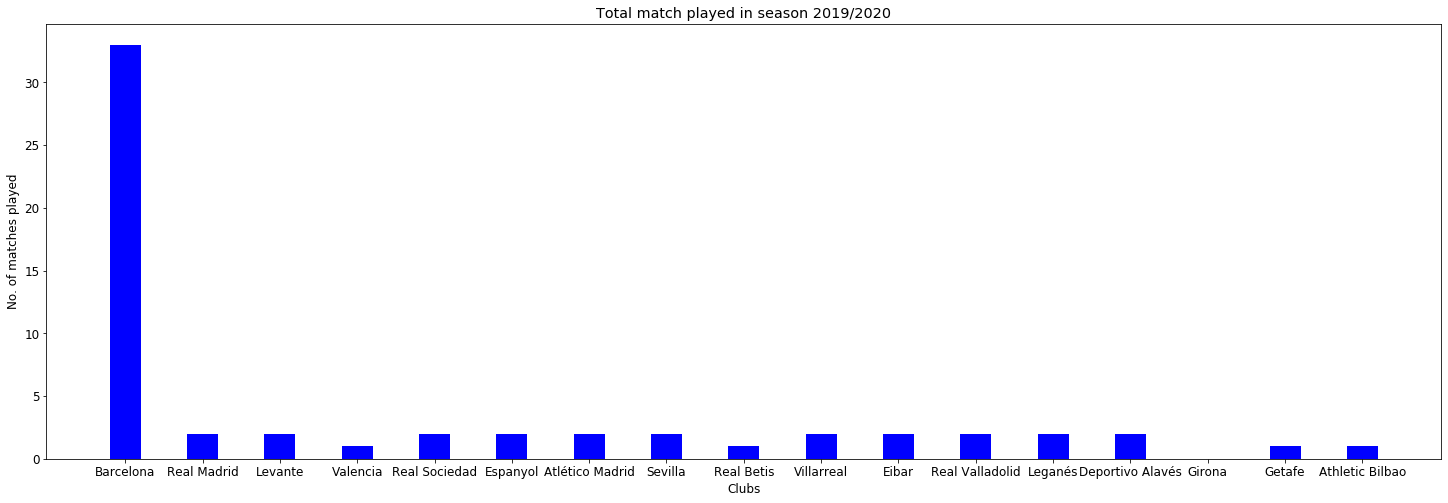

In [558]:
import numpy as np 
import matplotlib.pyplot as plt     
fig = plt.figure(figsize = (25, 8)) 
x=df2.Club
y=df2.MP
# creating the bar plot 
plt.bar(x, y, color ='blue',  
        width = 0.4)  
plt.xlabel("Clubs") 
plt.ylabel("No. of matches played") 
plt.title("Total match played in season 2019/2020") 
plt.show()

#### Point Table Clearly shows Barcelona is winning Laliga

In [559]:
print(f"Total number of goals scored in 2018/2019 = {sum(old_laliga['away_score'] + old_laliga['home_score'])}")

Total number of goals scored in 2018/2019 = 113


In [560]:
print(f"Total number of goals scored in 2017/2018 = {sum(old_laliga1['away_score'] + old_laliga1['home_score'])}")

Total number of goals scored in 2017/2018 = 117


In [561]:
print(f"Total number of goals scored in 2019/2020 = {sum(laliga['away_score'] + laliga['home_score'])}")

Total number of goals scored in 2019/2020 = 103


### Top 5 teams in La Liga 2019/2020

,Club,PTS
0,Barcelona,72
1,Real Madrid,4
2,Levante,3
3,Valencia,3
4,Real Sociedad,1


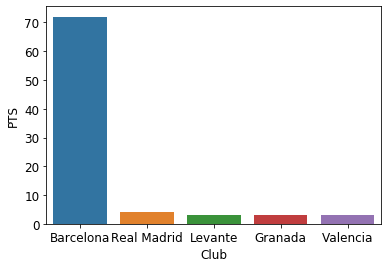

In [562]:
import seaborn as sns
display(df2.sort_values(by='PTS', ascending=False)[:5][['Club', 'PTS']])
sns.barplot(x='Club', y='PTS', data=league_table_df1.sort_values(by='PTS', ascending=False)[:5])

### Bottom 5 teams in La Liga 2019/2020

,Club,PTS
8,Real Betis,0
14,Girona,0
13,Deportivo Alavés,0
12,Leganés,0
11,Real Valladolid,0


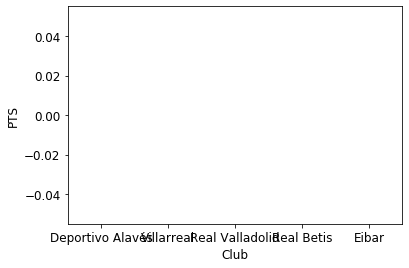

In [563]:
display(df2.sort_values(by='PTS', ascending=True)[:5][['Club', 'PTS']])
sns.barplot(x='Club', y='PTS', data=league_table_df1.sort_values(by='PTS', ascending=True)[:5])

### Top five teams with most number of goals. 2019/2020

,Club,F
0,Barcelona,72
2,Levante,4
6,Atlético Madrid,2
9,Villarreal,2
1,Real Madrid,2


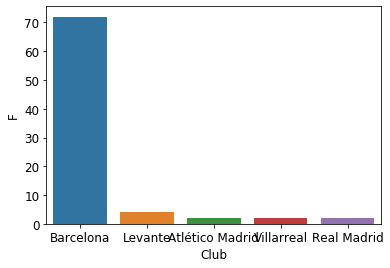

In [564]:
display(df2.sort_values(by='F',ascending=False)[:5][['Club', 'F']])
sns.barplot(x='Club', y='F', data=df2.sort_values(by='F',ascending=False)[:5])

### Top five teams with most draws. 2019/2020

,Club,D
0,Barcelona,6
4,Real Sociedad,1
5,Espanyol,1
6,Atlético Madrid,1
7,Sevilla,1


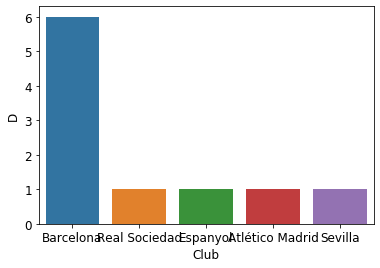

In [565]:
display(df2.sort_values(by='D',ascending=False)[:5][['Club', 'D']])
sns.barplot(x='Club', y='D', data=df2.sort_values(by='D',ascending=False)[:5])

In [566]:
def HA(df, home_param, away_param):
    home1 = {}
    away1 = {}
    for club in clubs2:
        home, away = 0, 0
        home = sum(lliga[lliga['Home_Team'] == club]['Result'] == home_param)
        away = sum(lliga[lliga['Away_Team'] == club]['Result'] == away_param)
        home1[club] = home
        away1[club] = away
    return (home1, away1)

In [567]:
home_wins, away_wins = HA(df=laliga, home_param='Home Won', away_param='Away Won')

In [568]:
print('Top five teams with most number of home wins:')
display(pd.Series(home_wins).sort_values(ascending=False)[:5])

print('\nTop five teams with most number of away wins:')
display(pd.Series(away_wins).sort_values(ascending=False)[:5])

Top five teams with most number of home wins:


Barcelona          14
Valencia            1
Real Madrid         1
Real Sociedad       0
Athletic Bilbao     0
dtype: int64


Top five teams with most number of away wins:


Barcelona     8
Celta Vigo    0
Espanyol      0
Sevilla       0
Valencia      0
dtype: int64

### Logistic Regression for 2019/2020

            home_score  away_score  match_week
home_score    1.000000   -0.237172   -0.365941
away_score   -0.237172    1.000000    0.249531
match_week   -0.365941    0.249531    1.000000
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

    Away Won       1.00      1.00      1.00         4
    Home Won       0.80      1.00      0.89         4

   micro avg       0.89      1.00      0.94         8
   macro avg       0.90      1.00      0.94         8
weighted avg       0.90      1.00      0.94         8

Accuracy: 0.8888888888888888


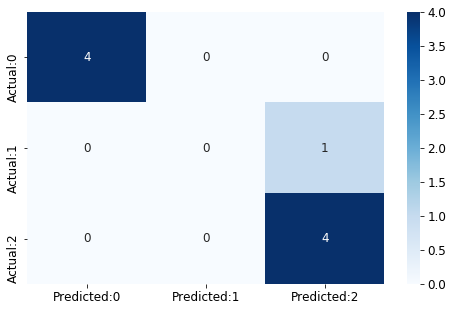

In [569]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = laliga[['home_score','away_score','match_week']] # Features
y = laliga['Result'] #Target
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, y,random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(x_training_data, y_training_data)
predicted=model.predict(x_test_data)
corr=X.corr()
print(corr)
print(model)
expected = y_test_data
#summarize the fit of the model
print(metrics.classification_report(expected, predicted, labels=np.unique(predicted)))
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(expected,predicted)
conf_matrix1=pd.DataFrame(data=cm1,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix1, annot=True,fmt='d',cmap="Blues")
print('Accuracy:',accuracy_score(expected,predicted))

### Event type : Shot 

In [570]:
from tqdm import tqdm
for i, event_id in tqdm(enumerate(old_laliga['match_id'])):
    events = sb.Events(event_id=str(event_id))
    data_ = events.get_dataframe(event_type='shot')
    data = data_ if i == 0 else pd.concat([data, data_])
data = data.reset_index(drop=True)





0it [00:00, ?it/s]



1it [00:02,  2.09s/it]



2it [00:04,  2.14s/it]



3it [00:06,  2.21s/it]



4it [00:08,  2.23s/it]



5it [00:11,  2.35s/it]



6it [00:17,  3.42s/it]



7it [00:20,  3.17s/it]



8it [00:23,  3.16s/it]



9it [00:26,  3.28s/it]



10it [00:29,  3.12s/it]



11it [00:31,  2.86s/it]



12it [00:33,  2.64s/it]



13it [00:36,  2.60s/it]



14it [00:40,  2.98s/it]



15it [00:43,  2.89s/it]



16it [00:45,  2.71s/it]



17it [00:49,  3.08s/it]



18it [00:54,  3.85s/it]



19it [00:57,  3.51s/it]



20it [00:59,  3.06s/it]



21it [01:01,  2.77s/it]



22it [01:04,  2.69s/it]



23it [01:06,  2.67s/it]



24it [01:09,  2.54s/it]



25it [01:11,  2.39s/it]



26it [01:13,  2.38s/it]



27it [01:15,  2.29s/it]



28it [01:17,  2.27s/it]



29it [01:19,  2.24s/it]



30it [01:21,  1.98s/it]



31it [01:22,  1.77s/it]



32it [01:23,  1.65s/it]



33it [01:25,  1.64s/it]



34it [01:27,  2.57s/it]


In [571]:
for i, event_id in tqdm(enumerate(old_laliga1['match_id'])):
    events = sb.Events(event_id=str(event_id))
    data_1 = events.get_dataframe(event_type='shot')
    data1 = data_1 if i == 0 else pd.concat([data1, data_1])
data1 = data1.reset_index(drop=True)





0it [00:00, ?it/s]



1it [00:01,  1.51s/it]



2it [00:03,  1.67s/it]



3it [00:05,  1.78s/it]



4it [00:07,  1.97s/it]



5it [00:10,  2.25s/it]



6it [00:13,  2.26s/it]



7it [00:14,  2.10s/it]



8it [00:16,  2.09s/it]



9it [00:19,  2.11s/it]



10it [00:20,  2.01s/it]



11it [00:23,  2.06s/it]



12it [00:25,  2.08s/it]



13it [00:28,  2.30s/it]



14it [00:30,  2.41s/it]



15it [00:32,  2.33s/it]



16it [00:35,  2.49s/it]



17it [00:39,  2.76s/it]



18it [00:41,  2.60s/it]



19it [00:45,  2.97s/it]



20it [00:47,  2.68s/it]



21it [00:49,  2.57s/it]



22it [00:51,  2.44s/it]



23it [00:53,  2.39s/it]



24it [00:55,  2.30s/it]



25it [00:57,  2.07s/it]



26it [00:59,  1.92s/it]



27it [01:01,  1.98s/it]



28it [01:03,  1.94s/it]



29it [01:04,  1.91s/it]



30it [01:07,  2.21s/it]



31it [01:10,  2.33s/it]



32it [01:12,  2.19s/it]



33it [01:14,  2.06s/it]



34it [01:16,  2.07s/it]



35it [01:18,  2.03s/it]



36it [01:20,  2.23s/it]


In [572]:
for i, event_id in tqdm(enumerate(laliga['match_id'])):
    events = sb.Events(event_id=str(event_id))
    data_2 = events.get_dataframe(event_type='shot')
    data2 = data_2 if i == 0 else pd.concat([data2, data_2])
data2 = data2.reset_index(drop=True)





0it [00:00, ?it/s]



1it [00:01,  1.61s/it]



2it [00:04,  1.89s/it]



3it [00:06,  1.96s/it]



4it [00:08,  2.08s/it]



5it [00:10,  2.07s/it]



6it [00:12,  2.00s/it]



7it [00:14,  1.92s/it]



8it [00:16,  1.90s/it]



9it [00:18,  1.95s/it]



10it [00:20,  1.93s/it]



11it [00:21,  1.93s/it]



12it [00:23,  1.94s/it]



13it [00:25,  1.86s/it]



14it [00:27,  2.00s/it]



15it [00:29,  1.95s/it]



16it [00:31,  1.95s/it]



17it [00:33,  1.89s/it]



18it [00:35,  1.89s/it]



19it [00:37,  1.90s/it]



20it [00:39,  1.86s/it]



21it [00:41,  1.89s/it]



22it [00:43,  1.98s/it]



23it [00:44,  1.91s/it]



24it [00:46,  1.81s/it]



25it [00:48,  1.81s/it]



26it [00:49,  1.75s/it]



27it [00:51,  1.69s/it]



28it [00:53,  1.71s/it]



29it [00:55,  1.78s/it]



30it [00:57,  1.87s/it]



31it [00:59,  2.03s/it]



32it [01:01,  2.05s/it]



33it [01:03,  1.92s/it]


In [573]:
shots = data[data['team']=='Real Madrid'].reset_index(drop=True)
shots1 = data[data['team']=='Barcelona'].reset_index(drop=True)

In [574]:
print('total number of shots:', len(shots))
print('play_pattern -', ((shots['play_pattern'].unique())))
print('type -', (shots['type'].unique()))
print('technique -', (shots['technique'].unique()))
print('outcome -', (shots['outcome'].unique()))

total number of shots: 18
play_pattern - ['From Free Kick' 'From Counter' 'From Throw In' 'From Corner'
 'Regular Play' 'From Goal Kick' 'From Keeper']
type - ['Free Kick' 'Open Play']
technique - ['Normal' 'Half Volley' 'Volley']
outcome - ['Off T' 'Blocked' 'Saved' 'Wayward']


In [575]:
print('total number of shots:', len(shots1))
print('play_pattern -', ((shots1['play_pattern'].unique())))
print('type -', (shots1['type'].unique()))
print('technique -', (shots1['technique'].unique()))
print('outcome -', (shots1['outcome'].unique()))

total number of shots: 521
play_pattern - ['From Free Kick' 'From Goal Kick' 'Regular Play' 'Other' 'From Corner'
 'From Kick Off' 'From Throw In' 'From Keeper' 'From Counter']
type - ['Free Kick' 'Open Play' 'Penalty']
technique - ['Normal' 'Half Volley' 'Volley' 'Overhead Kick' 'Lob' 'Diving Header'
 'Backheel']
outcome - ['Saved' 'Blocked' 'Off T' 'Goal' 'Post' 'Wayward' 'Saved to Post']


In [576]:
shotsR = data1[data1['team']=='Real Madrid'].reset_index(drop=True)
shotsB = data1[data1['team']=='Barcelona'].reset_index(drop=True)


In [577]:
print('total number of shots:', len(shotsR))
print('play_pattern -', ((shotsR['play_pattern'].unique())))
print('type -', (shotsR['type'].unique()))
print('technique -', (shotsR['technique'].unique()))
print('outcome -', (shotsR['outcome'].unique()))

total number of shots: 30
play_pattern - ['Regular Play' 'From Goal Kick' 'From Free Kick' 'From Throw In'
 'From Corner']
type - ['Open Play' 'Free Kick']
technique - ['Normal' 'Volley' 'Half Volley']
outcome - ['Saved' 'Goal' 'Off T' 'Blocked' 'Wayward' 'Post']


In [578]:
print('total number of shots:', len(shotsB))
print('play_pattern -', ((shotsB['play_pattern'].unique())))
print('type -', (shotsB['type'].unique()))
print('technique -', (shotsB['technique'].unique()))
print('outcome -', (shotsB['outcome'].unique()))

total number of shots: 546
play_pattern - ['From Corner' 'From Free Kick' 'From Throw In' 'Regular Play'
 'From Goal Kick' 'From Keeper' 'Other' 'From Counter']
type - ['Open Play' 'Free Kick' 'Penalty']
technique - ['Normal' 'Half Volley' 'Backheel' 'Volley' 'Lob' 'Overhead Kick']
outcome - ['Off T' 'Saved' 'Goal' 'Blocked' 'Wayward' 'Post']


In [579]:
shotsRM = data2[data2['team']=='Real Madrid'].reset_index(drop=True)
shotsBC = data2[data2['team']=='Barcelona'].reset_index(drop=True)

In [580]:
print('total number of shots:', len(shotsRM))
print('play_pattern -', ((shotsRM['play_pattern'].unique())))
print('type -', (shotsRM['type'].unique()))
print('technique -', (shotsRM['technique'].unique()))
print('outcome -', (shotsRM['outcome'].unique()))

total number of shots: 30
play_pattern - ['Regular Play' 'From Throw In' 'From Corner' 'From Counter'
 'From Free Kick']
type - ['Open Play' 'Free Kick']
technique - ['Normal' 'Half Volley' 'Volley']
outcome - ['Saved' 'Blocked' 'Off T' 'Post' 'Wayward' 'Goal']


In [581]:
print('total number of shots:', len(shotsBC))
print('play_pattern -', ((shotsBC['play_pattern'].unique())))
print('type -', (shotsBC['type'].unique()))
print('technique -', (shotsBC['technique'].unique()))
print('outcome -', (shotsBC['outcome'].unique()))

total number of shots: 430
play_pattern - ['From Free Kick' 'From Goal Kick' 'Regular Play' 'From Throw In'
 'From Keeper' 'From Corner' 'From Kick Off' 'From Counter' 'Other']
type - ['Open Play' 'Free Kick' 'Penalty']
technique - ['Normal' 'Half Volley' 'Volley' 'Lob' 'Diving Header' 'Overhead Kick'
 'Backheel']
outcome - ['Post' 'Off T' 'Saved' 'Goal' 'Wayward' 'Blocked' 'Saved Off Target']


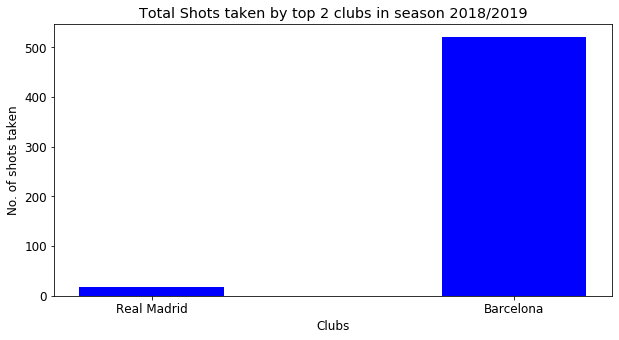

In [582]:
import numpy as np 
import matplotlib.pyplot as plt     
fig = plt.figure(figsize = (10, 5)) 
teams=['Real Madrid', 'Barcelona']
y=[len(shots),len(shots1)]
# creating the bar plot 
plt.bar(teams, y, color ='blue',  
        width = 0.4)  
plt.xlabel("Clubs") 
plt.ylabel("No. of shots taken") 
plt.title("Total Shots taken by top 2 clubs in season 2018/2019") 
plt.show() 

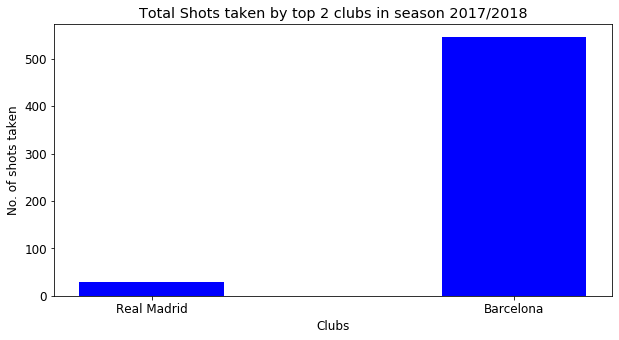

In [583]:
import numpy as np 
import matplotlib.pyplot as plt     
fig = plt.figure(figsize = (10, 5)) 
teams=['Real Madrid', 'Barcelona']
y=[len(shotsR),len(shotsB)]
# creating the bar plot 
plt.bar(teams, y, color ='blue',  
        width = 0.4)  
plt.xlabel("Clubs") 
plt.ylabel("No. of shots taken") 
plt.title("Total Shots taken by top 2 clubs in season 2017/2018") 
plt.show() 

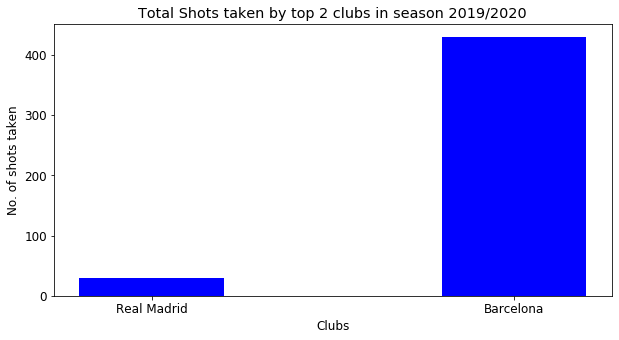

In [584]:
import numpy as np 
import matplotlib.pyplot as plt     
fig = plt.figure(figsize = (10, 5)) 
teams=['Real Madrid', 'Barcelona']
y=[len(shotsRM),len(shotsBC)]
# creating the bar plot 
plt.bar(teams, y, color ='blue',  
        width = 0.4)  
plt.xlabel("Clubs") 
plt.ylabel("No. of shots taken") 
plt.title("Total Shots taken by top 2 clubs in season 2019/2020") 
plt.show() 

In [585]:
shotsBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event_type        430 non-null    object 
 1   id                430 non-null    object 
 2   index             430 non-null    int64  
 3   period            430 non-null    int64  
 4   timestamp         430 non-null    object 
 5   minute            430 non-null    int64  
 6   second            430 non-null    int64  
 7   possession        430 non-null    int64  
 8   possession_team   430 non-null    object 
 9   play_pattern      430 non-null    object 
 10  off_camera        0 non-null      object 
 11  team              430 non-null    object 
 12  player            430 non-null    object 
 13  position          430 non-null    object 
 14  duration          430 non-null    float64
 15  under_pressure    72 non-null     object 
 16  statsbomb_xg      430 non-null    float64
 1

In [586]:
shotsBC.describe()

,index,period,minute,second,possession,duration,statsbomb_xg,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,319.000000
mean,2137.123256,1.520930,48.469767,29.839535,92.569767,0.660903,0.141828,104.772093,40.190465,115.845814,39.370930,1.513480
std,1141.931711,0.500144,26.691500,17.471384,51.473835,0.463542,0.163127,7.874254,9.255210,6.098192,6.418611,1.516297
min,44.000000,1.000000,0.000000,0.000000,2.000000,0.013308,0.011176,59.500000,15.200000,95.400000,0.100000,0.000000
25%,1184.250000,1.000000,26.250000,16.000000,53.000000,0.304231,0.037146,100.100000,32.750000,114.100000,36.400000,0.300000
50%,2103.000000,2.000000,47.000000,29.500000,91.000000,0.616961,0.073360,106.150000,40.050000,118.900000,39.600000,1.000000
75%,3141.000000,2.000000,72.000000,46.000000,136.500000,0.935617,0.182536,110.700000,47.300000,120.000000,43.500000,2.100000
max,4457.000000,2.000000,96.000000,59.000000,202.000000,3.349752,0.904528,119.300000,75.100000,120.000000,73.600000,6.600000


In [587]:
shotsBC.outcome

0                  Post
1                 Off T
2                  Post
3                  Post
4                 Saved
             ...       
425               Saved
426    Saved Off Target
427                Goal
428               Saved
429                Goal
Name: outcome, Length: 430, dtype: object

In [588]:
shotsBC['goal']=shotsBC['outcome'].apply(lambda x: 1 if x == 'Goal' else 0) 

In [589]:
shotsBC.goal

0      0
1      0
2      0
3      0
4      0
      ..
425    0
426    0
427    1
428    0
429    1
Name: goal, Length: 430, dtype: int64

In [590]:
for i in ['under_pressure', 'first_time', 'one_on_one', 'open_goal']:
    shotsBC[i] = shotsBC[i].fillna(0) * 1

In [591]:
num_cols=['under_pressure', 'first_time', 'one_on_one', 'open_goal']

### KNN Regressor and Logistic Regression for Target 'goal' (Expected goals)

In [592]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
def knn_train_test(df, features, target, k=5): 
    # features and target
    X = df[[features]]
    y = df[target]
    # K-fold validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    knn = KNeighborsRegressor(n_neighbors=k)
    mses = cross_val_score(knn, X, y, scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    return np.mean(np.sqrt(np.absolute(mses)))

In [593]:
for feature in num_cols:
    print(feature, ':', knn_train_test(shotsBC, feature, 'goal', k=5))

under_pressure : 0.3801378626316119
first_time : 0.3915906532214738
one_on_one : 0.37067889851298175
open_goal : 0.38931646571466316


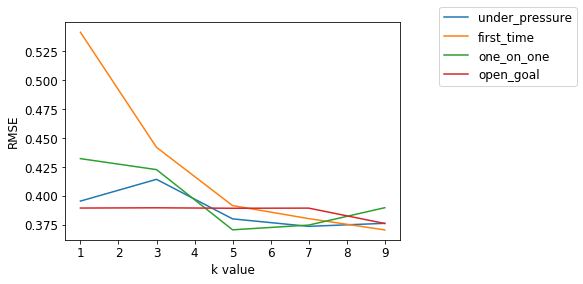

In [594]:
k_values = [1, 3, 5, 7, 9]
feature_k_rmses = dict()
for feature in num_cols:
    k_rmses = dict()
    for k in k_values:
        k_rmses[k] = knn_train_test(shotsBC, feature, 'goal', k)
    feature_k_rmses[feature] = k_rmses
    
for feature, k_rmses in feature_k_rmses.items():
    x = sorted(k_rmses.keys())
    y = list(k_rmses.values())
    
    plt.plot(x, y, label=feature)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left')
plt.show()

Empty DataFrame
Columns: []
Index: []
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        88

   micro avg       0.81      1.00      0.90        88
   macro avg       0.81      1.00      0.90        88
weighted avg       0.81      1.00      0.90        88

Accuracy: 0.8148148148148148


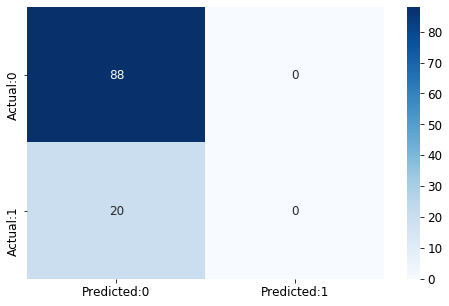

In [595]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = shotsBC[['under_pressure', 'first_time', 'one_on_one', 'open_goal']] # Features
y = shotsBC['goal'] #Target
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, y,random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(x_training_data, y_training_data)
predicted=model.predict(x_test_data)
corr=X.corr()
print(corr)
print(model)
expected = y_test_data
#summarize the fit of the model
print(metrics.classification_report(expected, predicted, labels=np.unique(predicted)))
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(expected,predicted)
conf_matrix1=pd.DataFrame(data=cm1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix1, annot=True,fmt='d',cmap="Blues")
print('Accuracy:',accuracy_score(expected,predicted))

In [596]:

y_pred_prob = model.predict_proba(x_test_data)[:, 1]

In [597]:
y_pred_prob

array([0.11498929, 0.11498929, 0.11498929, 0.11498929, 0.28423067,
       0.11498929, 0.11498929, 0.28423067, 0.28423067, 0.28423067,
       0.11498929, 0.11498929, 0.11498929, 0.28423067, 0.20217396,
       0.20217396, 0.11498929, 0.09024979, 0.11498929, 0.20217396,
       0.11498929, 0.20217396, 0.09024979, 0.11498929, 0.11498929,
       0.20217396, 0.11498929, 0.11498929, 0.11498929, 0.11498929,
       0.09024979, 0.09024979, 0.20217396, 0.20217396, 0.09024979,
       0.11498929, 0.28423067, 0.20217396, 0.09024979, 0.28423067,
       0.11498929, 0.20217396, 0.11498929, 0.11498929, 0.11498929,
       0.11498929, 0.20217396, 0.11498929, 0.11498929, 0.28423067,
       0.20217396, 0.11498929, 0.20217396, 0.20217396, 0.11498929,
       0.11498929, 0.09024979, 0.20217396, 0.11498929, 0.11498929,
       0.28423067, 0.16211293, 0.4242227 , 0.11498929, 0.11498929,
       0.09024979, 0.20217396, 0.20217396, 0.20217396, 0.16211293,
       0.11498929, 0.11498929, 0.11498929, 0.28423067, 0.11498

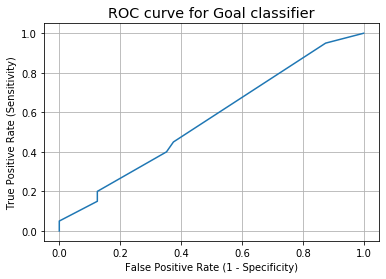

In [598]:
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

%matplotlib inline
''
fpr, tpr, thresholds = roc_curve(expected, y_pred_prob)
plt.plot(fpr, tpr)
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Goal classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [599]:
from sklearn.metrics import roc_auc_score

roc_auc_score(expected, y_pred_prob)

0.562215909090909

Text(0.5, 1.0, 'Precision_Recall_Curve')

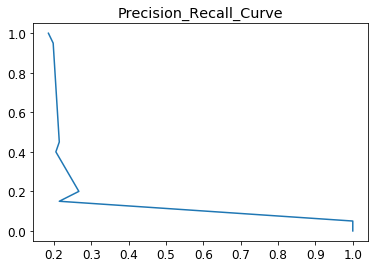

In [600]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(expected, y_pred_prob)
plt.plot(precision, recall)
plt.title('Precision_Recall_Curve')